In [7]:
## allow interaction with the plots
%matplotlib widget

%load_ext autoreload
%autoreload 2

# add the main directory reference and import 'imports.py'
import sys

if ".." not in sys.path:
    sys.path.insert(0, "..")
from imports import *

logger = logging.getLogger()
logger.setLevel(level=logging.WARN)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from data.Titanic import Titanic
from models.MLPClassifier import MLPClassifier


class Config:
    def __init__(self):
        self.batch_size = 32
        self.lr = 0.001
        self.hidden_size = 64
        self.layers = 4
        self.dropout = 0
        self.max_epochs = 60


params = Config()

data = Titanic(batch_size=params.batch_size)

data.preview(samples=1)
sample = data.sample_batch()
data.describe_index(0)

model = MLPClassifier(
    params.hidden_size,
    data.classes,
    params.layers,
)

Numerical indices: (3, 4, 5, 6)

Train Data (24 batches) Preview:
--------------------------------------------------


/home/archrichard/Documents/Obsidian_ARCHIVE/Personal/UNI/Now/AMATH445/A3/aq/.pixi/envs/default/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Constituent shapes:
batch[0]: torch.Size([32, 7]), torch.float32
batch[1]: torch.Size([32]), torch.int64

First 1 samples:

Sample 0: 

tensor([  1.0000,   0.0000,   1.0000,  22.0000,   0.0000,   0.0000, 151.5500])

1

Validation Data (5 batches)  Preview:
--------------------------------------------------

Sample 0: 

tensor([ 0.0000,  0.0000,  0.0000, 22.0000,  1.0000,  0.0000,  7.2500])

0

Training Batch[0] Statistics:
--------------------------------------------------

feature_dims [1]: 
Type: torch.float32
Min:
tensor([0., 0., 0., 9., 0., 0., 0.])
Max:
tensor([ 1.0000,  1.0000,  1.0000, 55.5000,  4.0000,  2.0000, 93.5000])
Mean:
tensor([ 0.2188,  0.1562,  0.3438, 32.7656,  0.3438,  0.1875, 20.4813])
Std:
tensor([ 0.4200,  0.3689,  0.4826, 11.9960,  0.7874,  0.4709, 22.1742])


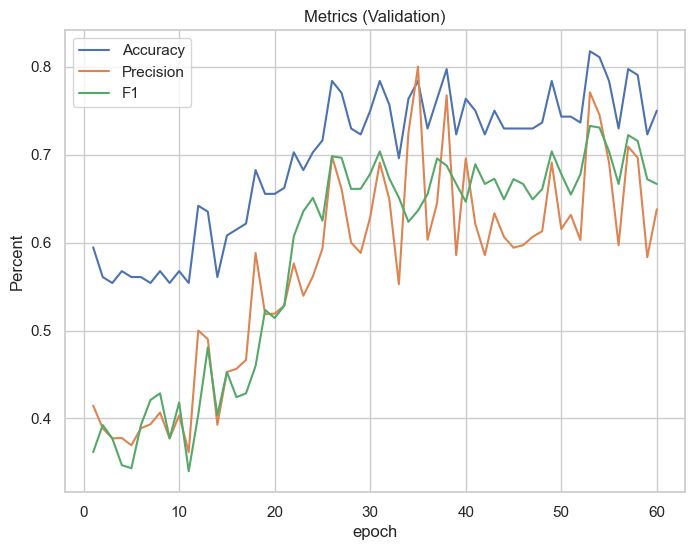

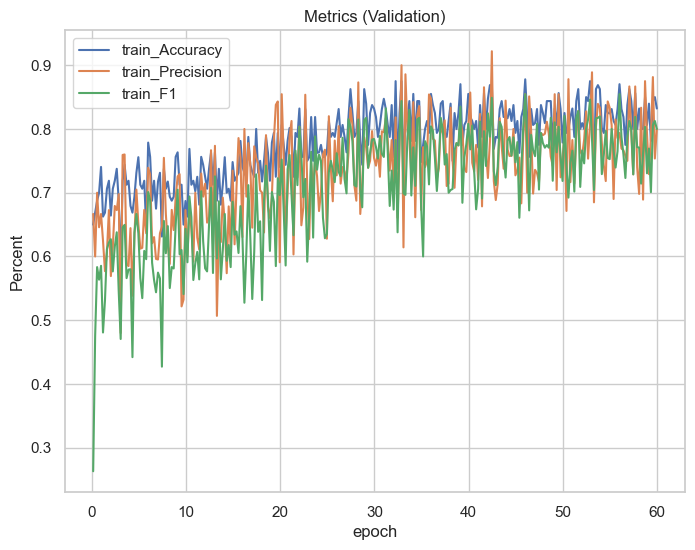

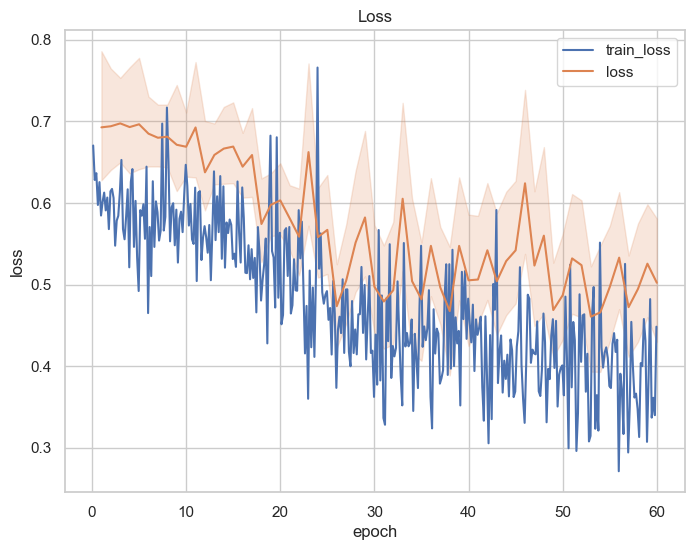

Epochs progress:   0%|          | 0/60 [00:00<?, ?Epoch/s]

tensor(0.3802, device='cuda:0')

In [19]:
classification_val = MetricsFrame(
    [
        from_te(torcheval.metrics.BinaryAccuracy, "Accuracy", model.pred),
        from_te(torcheval.metrics.BinaryPrecision, "Precision", model.pred),
        from_te(torcheval.metrics.BinaryF1Score, "F1", model.pred),
    ],
    flush_every=5,
)
cval_board = ProgressBoard(ylabel="Percent", title="Metrics (Validation)")
cval_board.add_mf(classification_val)

confusion = MetricsFrame(
    [from_te(torcheval.metrics.BinaryConfusionMatrix, "ConfusionMatrix", model.pred)],
    flush_every=0,
    xlabel=None,
)

classification_train = MetricsFrame(
    [
        from_te(torcheval.metrics.BinaryAccuracy, "Accuracy", model.pred),
        from_te(torcheval.metrics.BinaryPrecision, "Precision", model.pred),
        from_te(torcheval.metrics.BinaryF1Score, "F1", model.pred),
    ],
    flush_every=5,
)
ctrain_board = ProgressBoard(ylabel="Percent", title="Metrics (Validation)")
ctrain_board.add_mf(classification_train)

trainer = Trainer(
    max_epochs=params.max_epochs,
    lr=params.lr,
    train_mfs=[classification_train],
    val_mfs=[classification_val, confusion],
    flush_mfs=True,
)
trainer.fit(model, data.loaders())

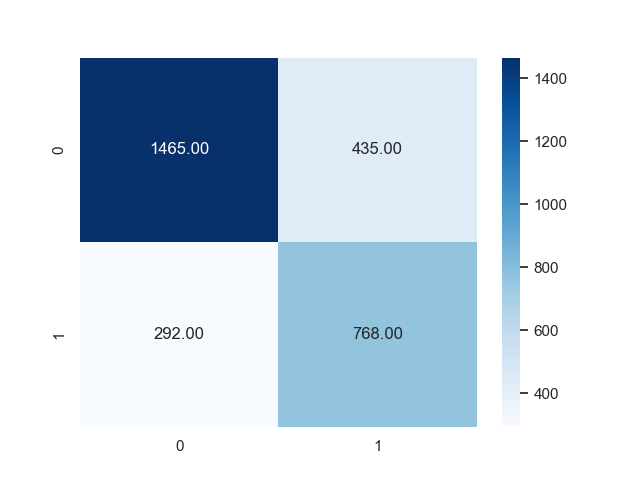

In [ ]:
plot_2dheatmap(confusion.dict["ConfusionMatrix"][0])
